# Data Science Challenge
Alejandra Neely

### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Partiremos importando los datos y explorando valor

In [8]:
import pandas as pd
df = pd.read_csv('dataset_SCL.csv')
df.head()

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_58037/2935201456.py:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_SCL.csv')


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [ ]:
df

A continuación revisamos la cantidad de nulos por cada variable y detectamos un solo nulo en la variable que indica el número de vuelo de operación del vuelo (Vlo-O). Por ahora lo dejaremos, ya que al conocer más los datos podremos tomar una mejor decisión respecto de qué hacer con este caso.

In [10]:
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [32]:
df[df['Vlo-O'].isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


No entiendo muy buen qué significa esta variable, por lo que para entender un poco más veré si es una variable categórica o si tiene valor numérico. Vemos que es una variable categórica, que puede adoptar 867 valores que van entre el 1 y 9956. Como desconocemos si estos número tienen algún peso, no tenemos información suficiente como para decidir imputar, y al ser un solo caso dentro

In [49]:
df['Vlo-O'].dtype

dtype('O')

In [42]:
len(df['Vlo-O'].unique())

867

In [48]:
min(pd.to_numeric(df['Vlo-O'], errors = 'coerce'))

1.0

In [50]:
max(pd.to_numeric(df['Vlo-O'], errors = 'coerce'))

9956.0

Otra inspección necesaria es ver la cantidad de datos que hay por año y por mes. Además de chequear la cantidad de vuelos por ruta. Vemos por ejemplo que hay solo dos casos el año 2018, pero no calza con el caso que contiene un nulo en Vlo-O.

In [11]:
df.groupby(['AÑO', 'MES']).size()

AÑO   MES
2017  1      6106
      2      5561
      3      5482
      4      5020
      5      5240
      6      4981
      7      5992
      8      5744
      9      5610
      10     6032
      11     6080
      12     6356
2018  1         2
dtype: int64

In [12]:
df[df['AÑO'] == 2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


Todos los vuelos provienen de Santiago

In [13]:
df.groupby(['SIGLAORI']).size()


SIGLAORI
Santiago    68206
dtype: int64

La ciudades de destino las graficaremos, ya que son 62 destinos, y es muy difícil observarlos todos. Los separaremos por unidad de negocio (Internacional - Nacional).

Los 5 destinos **internacionales** más comunes desde SCL son:
- Buenos Aires
- Lima
- Sao Paulo
- Ciudad de Panamá
- Mendoza

Las cinco ciudades son dentro del continente, y más accesibles en términos de precio para escapadas cortas de vacaciones y/o laborales. Esto podría explicar una mayor frecuencia de estos vuelos versus otros que recorren distancias más largas. Además, Lima, Buenos Aires y Sao Paulo tienden a ser aeropuertos de conexión, lo cual también puede explicar una mayor demanda de estas rutas.

Mientras que los 5 destinos **nacionales** más comunes desde SCL son:
- Antofagasta
- Calama
- Puerto Montt
- Concepción
- Temuco

Antofagasta y Calama son ciudades asociadas a la actividad minera en Chile, por lo que es posible que esas rutas tengan una alta demanda por personas de Santiago que trabajan en ese sector productivo. Por otro lado muchas personas que son de Puerto Montt, Concepción y Temuco terminan estudiando o trabajando en Santiago, volviendo recurrentemente a visitar familiares. Es solo una hipótesis, pero podrían ser las razones por las que son rutas tan demandadas.

In [19]:
len(df['SIGLADES'].unique())

62

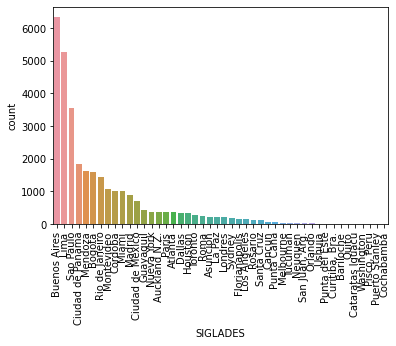

In [30]:
#import matplotlib as plt
import seaborn as sns

ax = sns.countplot(x="SIGLADES", 
    data= df[df['TIPOVUELO'] == 'I'],
    order=df[df['TIPOVUELO'] == 'I']['SIGLADES'].value_counts().index)
ax.tick_params(axis='x', rotation=90)


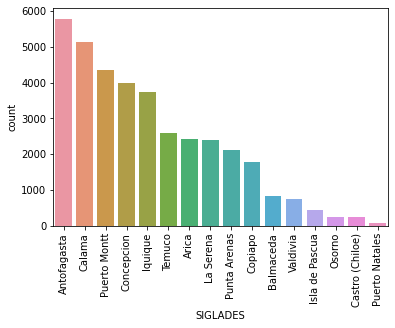

In [31]:
ax = sns.countplot(x="SIGLADES", 
    data= df[df['TIPOVUELO'] == 'N'],
    order=df[df['TIPOVUELO'] == 'N']['SIGLADES'].value_counts().index)
ax.tick_params(axis='x', rotation=90)

También vale la pena explorar la distribución según aerolínea que opera el vuelo, donde vemos que las 5 aerolíneas que operan los vuelos con más frecuencia son LATAM, Sky Airline, Aerolíneas Argentinas, Copa Air y Latin American Wings; luego le siguen Avianca y JetSmart SPA que también son bastantes conocidas. 
Este resultado se condice con la mayor frecuencia de vuelos con destinos nacionales y dentro del continente, ya que son aerolíneas que operan mayoritariamente vuelos dentro de Sud América.

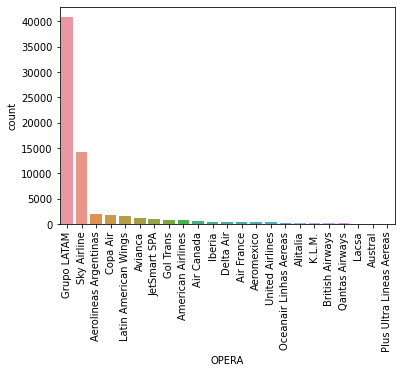

In [33]:
ax = sns.countplot(x="OPERA", 
    data= df,
    order=df['OPERA'].value_counts().index)
ax.tick_params(axis='x', rotation=90)

Anteriormente notamos un dato perdido y no lo eliminamos

import matplotl